<h1>Titolo</h1>
<h2>Studio di cose che faremo</h2>

In [128]:
#importiamo le librerie necessarie
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import sklearn.cluster as sk

#importiamo il dataset§
dataset = pd.read_csv('mymoviedb.csv', lineterminator='\n')

#visualizziamo il dataset a livello strutturale
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [129]:
#visualizziamo le prime righe del dataset per avere una visione più pratica
dataset.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [132]:
#vediamo i datatype delle colonne
dataset.dtypes

Release_Date          object
Title                 object
Overview              object
Popularity           float64
Vote_Count            object
Vote_Average          object
Original_Language     object
Genre                 object
Poster_Url            object
dtype: object

<h2>Pulizia del dataset</h2>

In [135]:
#Togliamo poster_url
dataset = dataset.drop('Poster_Url', axis=1)

#troviamo i valori nulli nel dataset
dataset.isnull().sum()

Release_Date          0
Title                 9
Overview              9
Popularity           10
Vote_Count           10
Vote_Average         10
Original_Language    10
Genre                11
dtype: int64

In [137]:
#eliminiamo i valori nulli di "title" 
dataset = dataset.dropna(subset=['Title'])
#visualizziamo le modifiche
dataset.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           1
Vote_Count           1
Vote_Average         1
Original_Language    1
Genre                2
dtype: int64

Abbiamo notato che i valori nulli sono scesi drasticamente perchè tutti legati alle righe con titoli nulli. Ora, dato che rimangono poche righe con valori nulli, riteniamo sia legittimo rimuoverle direttamente perchè poco influenti 

In [140]:
#Quindi adesso togliamo le righe con valori nulli
dataset = dataset.dropna()


Adesso controlliamo se ci sono valori duplicati e nel caso li eliminiamo 

In [143]:
#controlliamo se ci sono valori duplicati
dataset.duplicated().sum()

0

Come possiamo vedere, non sono presenti valori duplicati

In [146]:
#convertiamo il datatype di 'Vote_count e 'Vote_average' in float, per poter visualizzarli con describe
dataset['Vote_Count'] = dataset['Vote_Count'].astype(int, copy=False)
dataset['Vote_Average'] = dataset['Vote_Average'].astype(float, copy=False)
dataset.describe()
dataset.dtypes

Release_Date          object
Title                 object
Overview              object
Popularity           float64
Vote_Count             int64
Vote_Average         float64
Original_Language     object
Genre                 object
dtype: object

<h3>Andiamo vedere il range temporale in cui sono stati pubblicati i film

In [149]:
#vediamo il titolo delfilm meno recente e il più recente
dataset.Release_Date = pd.to_datetime(dataset.Release_Date)
min_date = dataset['Release_Date'].min()
max_date = dataset['Release_Date'].max()

print('Il film meno recente è:', dataset[dataset['Release_Date'] == min_date]['Title'].values[0], ', uscito il', min_date.date())
print('Il film più recente è:', dataset[dataset['Release_Date'] == max_date]['Title'].values[0], ', uscito il', max_date.date())

dataset.dtypes

Il film meno recente è: A Trip to the Moon , uscito il 1902-04-17
Il film più recente è: Despicable Me 4 , uscito il 2024-07-03


Release_Date         datetime64[ns]
Title                        object
Overview                     object
Popularity                  float64
Vote_Count                    int64
Vote_Average                float64
Original_Language            object
Genre                        object
dtype: object

Come possiao notare, nel database sono presenti dei film che non sono ancora usciti ma hanno già una data di pubblicazione ufficiale

<h2>Visualizzazione dei dati, in cerca di correlazioni</h2>

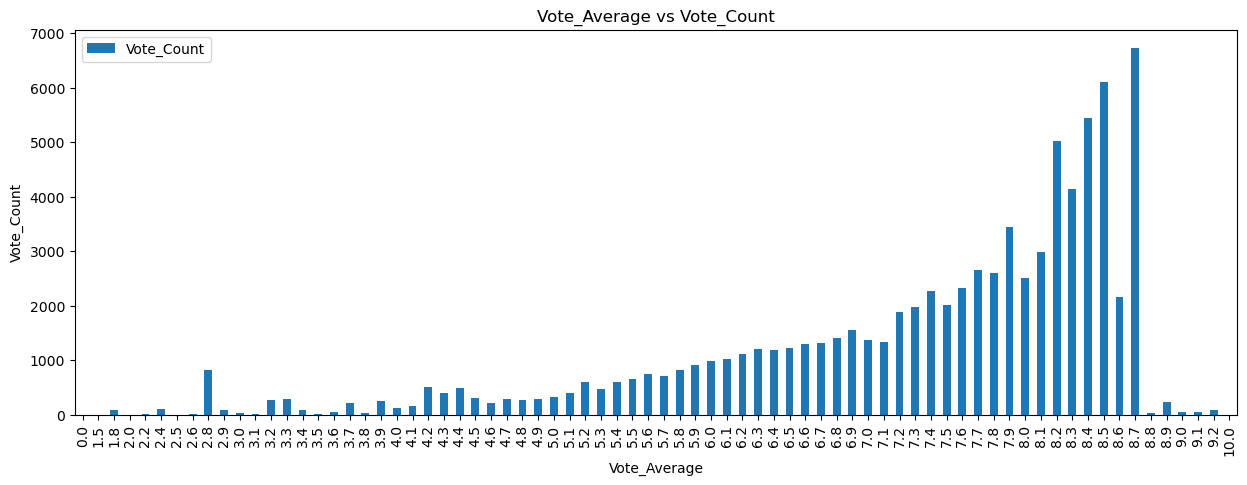

In [153]:
#visualizzazione di 'Vote_Average' e 'Vote_Count'
pivot = dataset.pivot_table(index='Vote_Average', values='Vote_Count', aggfunc='mean')
pivot.plot(kind='bar', figsize=(15, 5))
plt.xlabel('Vote_Average')
plt.ylabel('Vote_Count')
plt.title('Vote_Average vs Vote_Count')
plt.show()

Per poter quantizzare la popolarità la visuaizziamo a grafico

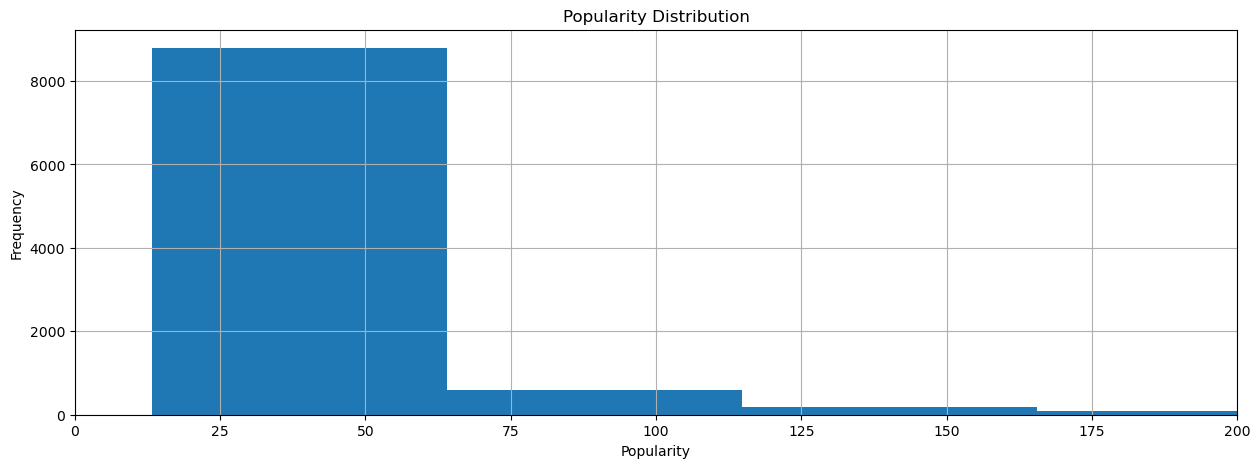

In [156]:
#visuallizziamo la distribuzione di 'Popularity'
histo = dataset['Popularity'].hist(bins=100, figsize=(15, 5))
plt.xlim(0, 200) #limitiamo l'asse y per una migliore visualizzazione
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Popularity Distribution')
plt.show()

Quantizzazione delle date di uscita
1. VERY OLD = [1900, 1980]
2. OLD = [1981, 2000]
3. RECENT = [2001, 2015]
4. VERY RECENT = [2016, 2024]

Quantizziamo anche i voti
1. BAD = [0, 4.9]
2. SUFFICIENT = [5, 5.9]
3. GOOD = [6, 6.9]
4. VERY GOOD = [7, 7.9]
5. EXCELLENT = [8, 10]

Quantizziamo anche popularity
1. NOT POPULAR = [0 ,39.9] 
2. AVARAGE = [40, 59.9]
3. POPULAR = [60, 1999.9]
4. BLOCKBUSTER = [2000, 5084]

In [159]:
dataset.dtypes

Release_Date         datetime64[ns]
Title                        object
Overview                     object
Popularity                  float64
Vote_Count                    int64
Vote_Average                float64
Original_Language            object
Genre                        object
dtype: object

In [161]:

quantize_release_date = ['VERY OLD', 'OLD', 'RECENT', 'VERY-RECENT']
minimum = [1900, 1981, 2001, 2016]
maximum = [1980, 2000, 2015, 2024]

dataset.Release_Date = pd.to_datetime(dataset.Release_Date)
dataset.dtypes
for i in range(4):
    dataset.loc[dataset['Release_Date'].dt.year.between(minimum[i], maximum[i]), 'quant_Release_Date'] = quantize_release_date[i]

#visualizziamo la nuova colonna
print(dataset['quant_Release_Date'])


0       VERY-RECENT
1       VERY-RECENT
2       VERY-RECENT
3       VERY-RECENT
4       VERY-RECENT
           ...     
9832       VERY OLD
9833    VERY-RECENT
9834    VERY-RECENT
9835    VERY-RECENT
9836            OLD
Name: quant_Release_Date, Length: 9826, dtype: object


In [163]:
#Quantizziamo la colonna 'Vote_Average'
quantize_vote_average = ['VERY BAD', 'BAD', 'AVERAGE', 'GOOD', 'VERY GOOD']
minimum = [0, 5, 6, 7, 8]
maximum = [4.9, 5.9, 6.9, 7.9, 10]


for i in range(5):
    dataset.loc[dataset['Vote_Average'].between(minimum[i], maximum[i]), 'quant_vote_average'] = quantize_vote_average[i]


In [165]:
#Abbiamo notato che alcuni valori di Popularity hanno molte cifre decimali, quindi abbiamo deciso di arrotondarli a 1 cifra decimale
dataset['Popularity'] = dataset['Popularity'].round(1)


#Quantizziamo la colonna 'Popularity'
quantize_popularity = ['NOT POPULAR', 'AVERAGE', 'POPULAR', 'BLOCKBUSTER']
minimum = [0, 40, 60, 2000]
maximum = [39.9, 59.9, 1999.9, 5084]

for i in range(4):
    dataset.loc[dataset['Popularity'].between(minimum[i], maximum[i]), 'quant_popularity'] = quantize_popularity[i]
    


In [167]:
dataset.describe()
dataset.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,quant_Release_Date,quant_vote_average,quant_popularity
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5084.0,8940,8.3,en,"Action, Adventure, Science Fiction",VERY-RECENT,VERY GOOD,BLOCKBUSTER
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.7,1151,8.1,en,"Crime, Mystery, Thriller",VERY-RECENT,VERY GOOD,BLOCKBUSTER
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.1,122,6.3,en,Thriller,VERY-RECENT,AVERAGE,BLOCKBUSTER
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.2,5076,7.7,en,"Animation, Comedy, Family, Fantasy",VERY-RECENT,GOOD,BLOCKBUSTER
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.5,1793,7.0,en,"Action, Adventure, Thriller, War",VERY-RECENT,GOOD,POPULAR


<h1>HEATMAP<h1>

<Axes: >

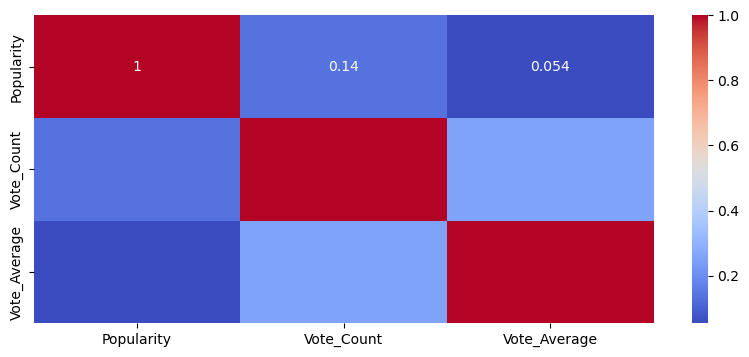

In [170]:
hm = dataset.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 4))
sns.heatmap(hm.corr(), annot=True, cmap='coolwarm')


<h2>Olap</h2>

In [173]:
#dataset.value_counts('quant_vote_average')
#vogliamo vedere quando quant_popularity vale "POPULAR" 
#print(dataset[dataset['quant_popularity'] == 'nan'])

dataset.value_counts('quant_popularity')
dataset.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,quant_Release_Date,quant_vote_average,quant_popularity
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5084.0,8940,8.3,en,"Action, Adventure, Science Fiction",VERY-RECENT,VERY GOOD,BLOCKBUSTER
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.7,1151,8.1,en,"Crime, Mystery, Thriller",VERY-RECENT,VERY GOOD,BLOCKBUSTER
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.1,122,6.3,en,Thriller,VERY-RECENT,AVERAGE,BLOCKBUSTER
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.2,5076,7.7,en,"Animation, Comedy, Family, Fantasy",VERY-RECENT,GOOD,BLOCKBUSTER
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.5,1793,7.0,en,"Action, Adventure, Thriller, War",VERY-RECENT,GOOD,POPULAR


In [175]:
OLAP = np.zeros((len(quantize_popularity), len(quantize_release_date), len(quantize_vote_average)))
for z in range(0, len(quantize_popularity)):
    for j in range(0, len(quantize_release_date)):
        for i in range(0, len(quantize_vote_average)):
            OLAP[z, j, i] = ((dataset['quant_popularity'] == quantize_popularity[z]) & 
                             (dataset['quant_Release_Date'] == quantize_release_date[j]) &
                             (dataset['quant_vote_average'] == quantize_vote_average[i])).sum()

print(quantize_popularity)
print(quantize_release_date)
print(quantize_vote_average)
print(OLAP)


['NOT POPULAR', 'AVERAGE', 'POPULAR', 'BLOCKBUSTER']
['VERY OLD', 'OLD', 'RECENT', 'VERY-RECENT']
['VERY BAD', 'BAD', 'AVERAGE', 'GOOD', 'VERY GOOD']
[[[1.600e+01 5.200e+01 1.930e+02 3.330e+02 7.600e+01]
  [7.600e+01 3.060e+02 7.370e+02 4.390e+02 3.900e+01]
  [2.010e+02 7.980e+02 1.343e+03 7.270e+02 6.000e+01]
  [2.200e+02 5.150e+02 9.380e+02 6.080e+02 1.000e+02]]

 [[0.000e+00 1.000e+00 4.000e+00 1.300e+01 9.000e+00]
  [1.000e+00 1.200e+01 3.100e+01 4.800e+01 1.400e+01]
  [1.700e+01 8.600e+01 2.080e+02 1.150e+02 1.600e+01]
  [1.200e+01 5.200e+01 1.480e+02 9.200e+01 2.400e+01]]

 [[0.000e+00 1.000e+00 1.000e+00 1.300e+01 3.000e+00]
  [3.000e+00 6.000e+00 2.300e+01 2.600e+01 1.300e+01]
  [8.000e+00 5.400e+01 1.640e+02 1.300e+02 1.600e+01]
  [3.900e+01 9.100e+01 2.420e+02 2.450e+02 6.400e+01]]

 [[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
  [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
  [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
  [0.000e+00 0.000e+00 1.000e+00 1

Rigone sono Popularity, Righe sono release_date, Colonne sono Vote_average


Procediamo allo slicing dell'olap, in modo da visualizzare...

In [179]:
MOVIE = OLAP[1]
print(MOVIE)

[[  0.   1.   4.  13.   9.]
 [  1.  12.  31.  48.  14.]
 [ 17.  86. 208. 115.  16.]
 [ 12.  52. 148.  92.  24.]]


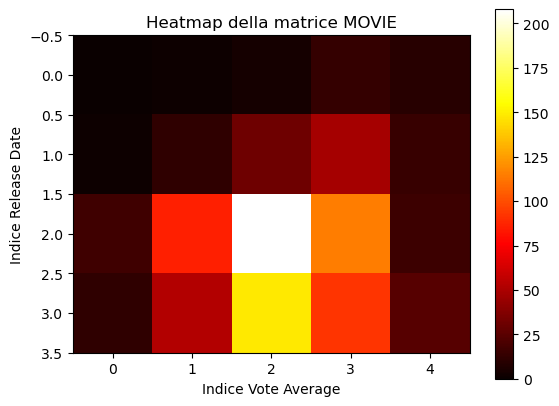

In [181]:
plt.imshow(MOVIE, cmap='hot', interpolation='nearest')
plt.colorbar()  # Aggiunge una barra dei colori per indicare il valore
plt.title('Heatmap della matrice MOVIE')
plt.xlabel('Indice Vote Average')
plt.ylabel('Indice Release Date')
plt.show()

Ora facciamo un dicing...

In [184]:
AVERAGE_and_VERYRECENT = OLAP[:,3,2]

print(AVERAGE_and_VERYRECENT)
#codice qui

[938. 148. 242.   1.]


Visualizziamolo con un grafico a barre 

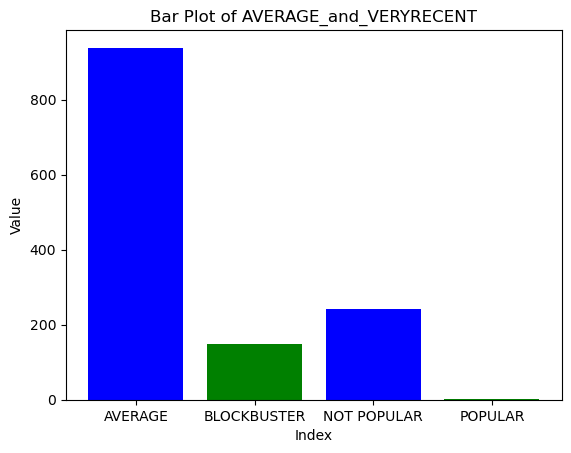

In [187]:
# Grafico a barre con l'indice sull'asse x e il valore sull'asse y
plt.bar(range(len(AVERAGE_and_VERYRECENT)), AVERAGE_and_VERYRECENT, color=['blue', 'green'])  

# Etichette degli assi
plt.xlabel('Index')
plt.ylabel('Value')

# Nomi delle categorie sugli assi x
plt.xticks(range(len(AVERAGE_and_VERYRECENT)), ['AVERAGE','BLOCKBUSTER','NOT POPULAR','POPULAR'])

# Titolo del grafico
plt.title('Bar Plot of AVERAGE_and_VERYRECENT')

# Mostra il grafico
plt.show()

<h1>Test statistico</h1>


Visualizziamo i valori di Vote_Average, separati per Genre, utilizzando dei box plot.

Prima però è necessario trasformare la colonna Genre in modo che abbia un solo genere per film

In [192]:
dataset["Genre"] = dataset["Genre"].str.split(',').str[0]
dataset.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,quant_Release_Date,quant_vote_average,quant_popularity
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5084.0,8940,8.3,en,Action,VERY-RECENT,VERY GOOD,BLOCKBUSTER
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.7,1151,8.1,en,Crime,VERY-RECENT,VERY GOOD,BLOCKBUSTER
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.1,122,6.3,en,Thriller,VERY-RECENT,AVERAGE,BLOCKBUSTER
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.2,5076,7.7,en,Animation,VERY-RECENT,GOOD,BLOCKBUSTER
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.5,1793,7.0,en,Action,VERY-RECENT,GOOD,POPULAR


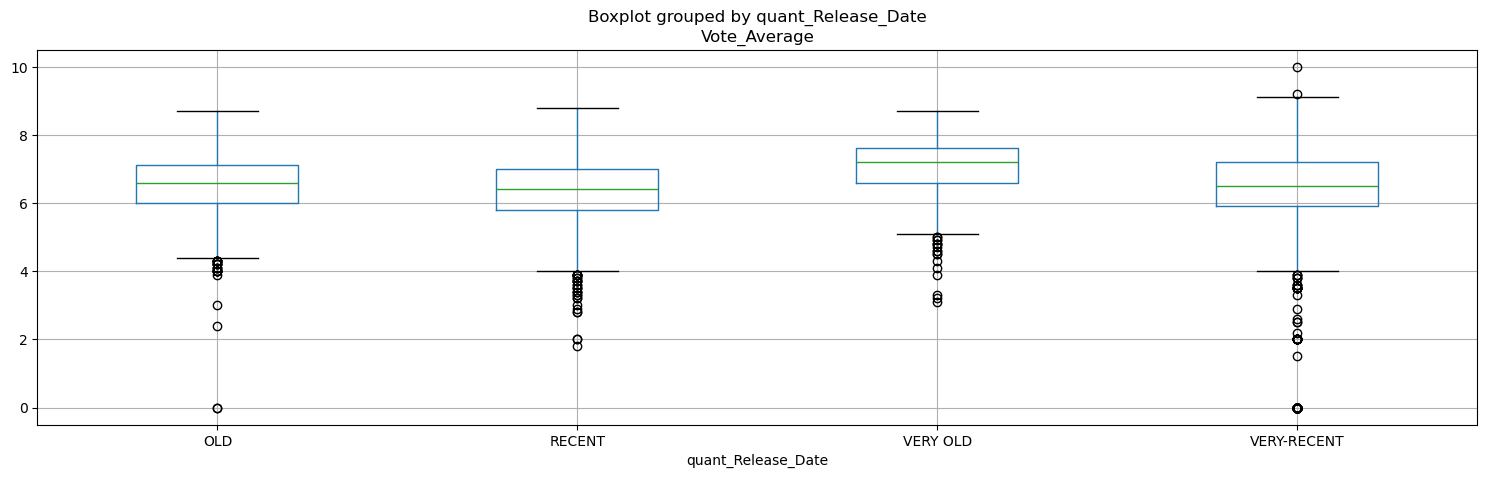

In [194]:
dataset.boxplot(column='Vote_Average',by='quant_Release_Date',figsize=(18,5))
plt.show()

In [196]:
old_count = dataset[dataset['quant_Release_Date'] == 'OLD'].shape[0]
very_recent_count = dataset[dataset['quant_Release_Date'] == 'VERY-RECENT'].shape[0]

print("Number of elements in class OLD:", old_count)
print("Number of elements in class VERY-RECENT:",very_recent_count)

Number of elements in class OLD: 1774
Number of elements in class VERY-RECENT: 3394


In [198]:
old_count = dataset[dataset['quant_Release_Date'] == 'OLD']["Vote_Average"]
very_recent_count = dataset[dataset['quant_Release_Date'] == 'VERY-RECENT']["Vote_Average"]

# Perform t-test
t_stat, p_value = stats.ttest_ind(old_count, very_recent_count)

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Compare p-value with significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The means are statistically different.")
else:
    print("Fail to reject the null hypothesis. The means are not statistically different.")
#DA VERIFICARE

T-statistic: 5.127906522153585
P-value: 3.036758000146715e-07
Reject the null hypothesis. The means are statistically different.


<h1>Metodo predittivo</h1>

Text(0.5, 0, 'Genre')

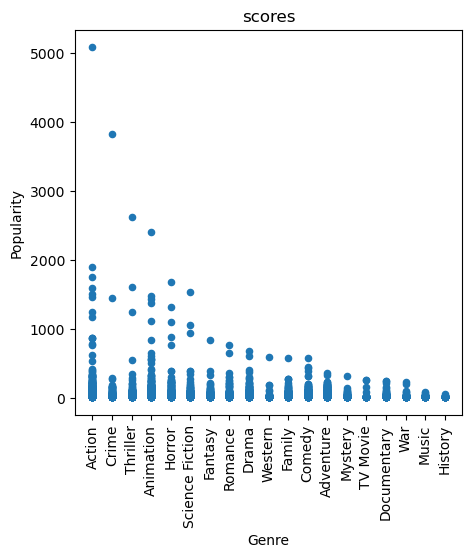

In [201]:
dataset.plot(kind ='scatter',y='Popularity', x='Genre', figsize = (5,5))
plt.xticks(rotation=90)
plt.title('scores')
plt.ylabel('Popularity')
plt.xlabel('Genre')


#deduciamo se c'è correlazione 

In [243]:
genre_mapping = {'Action': 1, 'Crime': 2, 'Thriller': 3, 'Animation': 4, 
                 'Horror': 5, 'Science Fiction': 6, 'Fantasy': 7, 'Romance': 8,
                'Drama': 9, 'Western': 10, 'Family': 11, 'Comedy': 12, 
                 'Adventure': 13, 'Mystery': 14, 'TV Movie': 15,'Documentary': 16,
                 'War': 17, 'Music': 18,'History': 19}

# Map genre column to numerical values
dataset['genre_encoded'] = dataset['Genre'].map(genre_mapping)

correlation = dataset[['Popularity','genre_encoded']].corr()
print(correlation)

               Popularity  genre_encoded
Popularity       1.000000      -0.082829
genre_encoded   -0.082829       1.000000


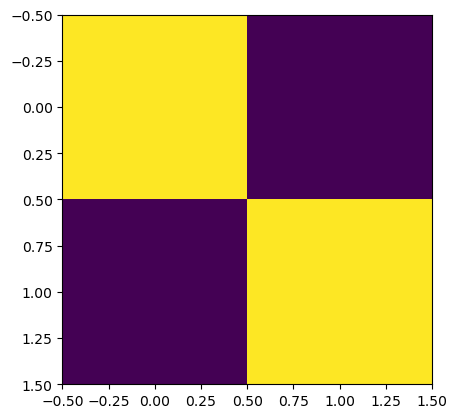

In [205]:
plt.imshow(correlation)

In [261]:
from sklearn.model_selection import train_test_split

# Definire le caratteristiche da usare
features = ['Vote_Average']

# Definire X e y
X = dataset[features]
y = dataset['Popularity']

# Dividere il dataset in training e validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.2)

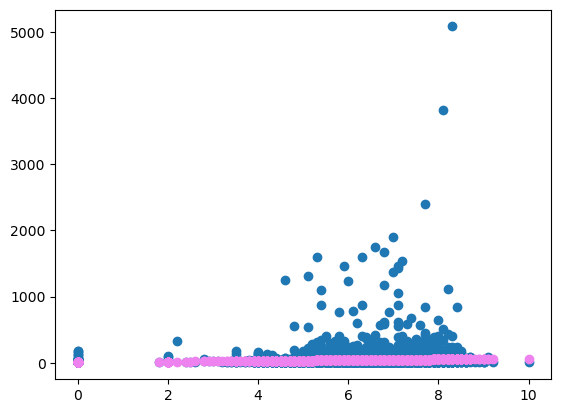

In [263]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
reg = regressor.fit(X_train, y_train)
y_pred = reg.coef_*X_train + reg.intercept_
plt.scatter(X_train,y_train)
plt.scatter(X_train,y_pred,color="violet")

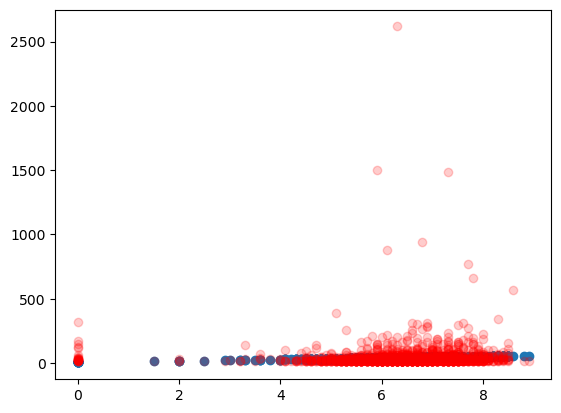

In [265]:
y_hat = reg.predict(X_valid)
plt.scatter(X_valid,y_hat)
plt.scatter(X_valid,y_valid,c='r',alpha=0.2)

In [267]:
import sklearn.metrics as metrics 
print ('MAE:', metrics.mean_absolute_error(y_valid, y_pred))
print ('MSE:', metrics.mean_squared_error(y_valid, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

ValueError: Found input variables with inconsistent numbers of samples: [1966, 7860]

<h1>Clustering </h2>

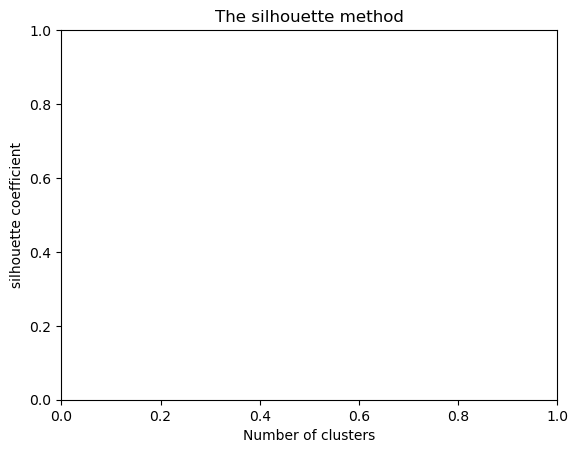

Text(0.5, 0, 'Vote_Average')

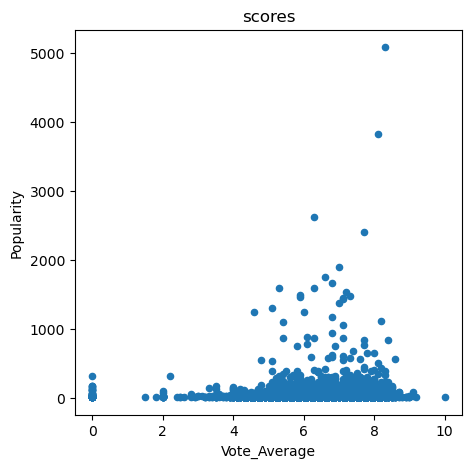

In [270]:
dataset.plot(kind ='scatter',y='Popularity', x='Vote_Average', figsize = (5,5))
plt.title('scores')
plt.ylabel('Popularity')
plt.xlabel('Vote_Average')


#deduciamo se c'è correlazione 

In [279]:
correlation = dataset[['Popularity','Vote_Average']].corr()
print(correlation)

              Popularity  Vote_Average
Popularity      1.000000      0.053837
Vote_Average    0.053837      1.000000


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


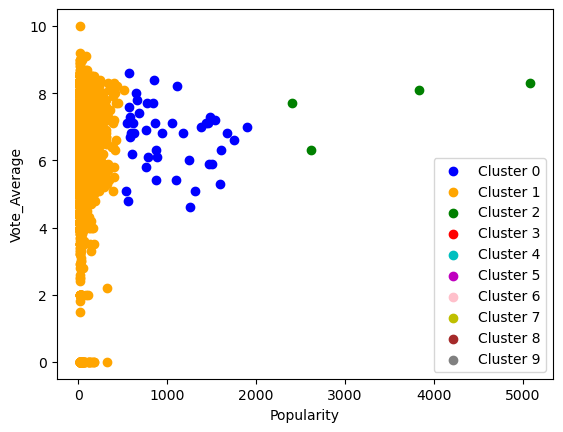

In [289]:
release_mapping = {'VERY OLD': 1, 'OLD': 2, 'RECENT': 3, 'VERY-RECENT': 4}

# Map genre column to numerical values
dataset['release_encoded'] = dataset['quant_Release_Date'].map(release_mapping)

kmeans = sk.KMeans(n_clusters=3, random_state=1)

clusters = kmeans.fit_predict(dataset[["Popularity", "Vote_Average","genre_encoded","release_encoded"]])
dataset["cluster"] = clusters
y = kmeans.labels_

color = ['b','orange','g','r', 'c', 'm', 'pink', 'y', 'brown', 'gray']

for i in range(0, 10):
    plt.scatter(dataset.loc[dataset['cluster'] == i, 'Popularity'], 
                dataset.loc[dataset['cluster'] == i, 'Vote_Average'], 
                color=color[i], label='Cluster ' + str(i))

plt.xlabel('Popularity')
plt.ylabel('Vote_Average')
plt.legend()
plt.show()